In [1]:
#Monta google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

sex_offenders = pd.read_csv('/content/drive/MyDrive/estatistica/Sex_Offenders.csv')
crimes = pd.read_csv('/content/drive/MyDrive/estatistica/Crimes_2001_to_Present_Cut_Version.csv', low_memory=False)

In [3]:
sex_offenders.head()

,LAST,FIRST,BLOCK,GENDER,RACE,BIRTH DATE,HEIGHT,WEIGHT,VICTIM MINOR
0,WILLIAMS,GLYNN,086XX S COLFAX AVE,MALE,BLACK,07/03/1962,509,189,Y
1,CHRISTIANSEN,DWIGHT,004XX N WABASH AVE,MALE,WHITE,09/26/1959,600,190,Y
2,VERDINO,LAWRENCE,054XX W BARRY AVE,MALE,WHITE,09/26/1957,510,230,Y
3,GASCOIGNE,DUSTIN,11XXX S STATE ST,MALE,WHITE,09/17/1987,511,208,Y
4,BARNETT,UNDERWOOD,014XX W 73RD ST,MALE,BLACK,07/31/1948,510,175,Y


In [4]:
print(sex_offenders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LAST          3865 non-null   object
 1   FIRST         3865 non-null   object
 2   BLOCK         3849 non-null   object
 3   GENDER        3865 non-null   object
 4   RACE          3865 non-null   object
 5   BIRTH DATE    3865 non-null   object
 6   HEIGHT        3865 non-null   int64 
 7   WEIGHT        3865 non-null   int64 
 8   VICTIM MINOR  3865 non-null   object
dtypes: int64(2), object(7)
memory usage: 271.9+ KB
None


In [5]:
crimes.head()

,Date,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,District,Community Area,Year,Location
0,06/10/2025 12:00:00 AM,034XX W HARRISON ST,0486,BATTERY,STREET,False,True,11.0,27.0,2025,"(41.873620574, -87.711392136)"
1,06/10/2025 12:00:00 AM,014XX N CLYBOURN AVE,2826,OTHER OFFENSE,APARTMENT,False,True,18.0,8.0,2025,"(41.908398891, -87.646018932)"
2,06/10/2025 12:00:00 AM,076XX S PARNELL AVE,0460,BATTERY,APARTMENT,False,False,6.0,69.0,2025,"(41.75519145, -87.638632873)"
3,06/10/2025 12:00:00 AM,0000X W MONROE ST,0460,BATTERY,STREET,True,False,1.0,32.0,2025,"(41.880743831, -87.62813836)"
4,06/10/2025 12:00:00 AM,002XX W ALEXANDER ST,2825,OTHER OFFENSE,APARTMENT,False,False,9.0,34.0,2025,"(41.851432389, -87.633503604)"


In [6]:
print(crimes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3623256 entries, 0 to 3623255
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Block                 object 
 2   IUCR                  object 
 3   Primary Type          object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   District              float64
 8   Community Area        float64
 9   Year                  int64  
 10  Location              object 
dtypes: bool(2), float64(2), int64(1), object(6)
memory usage: 255.7+ MB
None


In [7]:
# -- TRATAMENTO DOS DADOS -- #

sex_offenders['GENDER'] = sex_offenders['GENDER'].astype('category')
sex_offenders['RACE'] = sex_offenders['RACE'].astype('category')
sex_offenders['BIRTH DATE'] = pd.to_datetime(sex_offenders['BIRTH DATE'], format='%m/%d/%Y', errors='coerce')
sex_offenders['VICTIM MINOR'] = sex_offenders['VICTIM MINOR'].astype('category')
sex_offenders['BLOCK'] = sex_offenders['BLOCK'].astype('category')
crimes['Date'] = pd.to_datetime(crimes['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
crimes['Primary Type'] = crimes['Primary Type'].astype('category')
crimes['Block'] = crimes['Block'].astype('category')
crimes['IUCR'] = crimes['IUCR'].astype('category')
crimes['Location Description'] = crimes['Location Description'].astype('category')
crimes['District'] = crimes['District'].astype('category')
crimes['Community Area'] = crimes['Community Area'].astype('category')
print(sex_offenders.head())
print(sex_offenders.info())
print(sex_offenders.columns)
print(crimes.head())
print(crimes.info())

#Tratamento de valores nulos - Remoção das linhas com valores nulos ou que puderam ser convertidos pros tipos definidos
sex_offenders_colunas_criticas = ['BIRTH DATE', 'BLOCK', 'GENDER', 'RACE']
sex_offenders.dropna(subset=sex_offenders_colunas_criticas, inplace=True)

crimes_colunas_criticas = ['Date', 'Block', 'Community Area', 'Primary Type']
crimes.dropna(subset=crimes_colunas_criticas, inplace=True)

# Remover Community Area inválida (0)
crimes['Community Area'] = crimes['Community Area'].astype(int)
crimes = crimes[crimes['Community Area'] != 0]
crimes['Community Area'] = crimes['Community Area'].astype('category')

           LAST      FIRST               BLOCK GENDER   RACE BIRTH DATE  \
0      WILLIAMS      GLYNN  086XX S COLFAX AVE   MALE  BLACK 1962-07-03   
1  CHRISTIANSEN     DWIGHT  004XX N WABASH AVE   MALE  WHITE 1959-09-26   
2       VERDINO   LAWRENCE   054XX W BARRY AVE   MALE  WHITE 1957-09-26   
3     GASCOIGNE     DUSTIN    11XXX S STATE ST   MALE  WHITE 1987-09-17   
4       BARNETT  UNDERWOOD     014XX W 73RD ST   MALE  BLACK 1948-07-31   

   HEIGHT  WEIGHT VICTIM MINOR  
0     509     189            Y  
1     600     190            Y  
2     510     230            Y  
3     511     208            Y  
4     510     175            Y  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   LAST          3865 non-null   object        
 1   FIRST         3865 non-null   object        
 2   BLOCK         3849 non-null   category  

In [8]:
# Adiciona mapeamento de 'Community Area' no dataset 'Sex_offenders'

block_para_community = crimes.dropna(subset=['Community Area']).drop_duplicates(subset=['Block'])[['Block', 'Community Area']]
block_mapping = dict(zip(block_para_community['Block'], block_para_community['Community Area']))
sex_offenders['Community Area'] = sex_offenders['BLOCK'].map(block_mapping)
mapeamento_manual = {
        '12XXX S GREEN ST': 53.0,
        '11XXX S STATE ST': 49.0,
        '12XXX S LAFAYETTE AVE': 53.0,
        '11XXX S PERRY AVE': 49.0,
        '10XXX S LAFAYETTE AVE': 49.0,
        '10XXX S WABASH AVE': 49.0,
        '12XXX S WENTWORTH AVE': 53.0,
        '11XXX S EMERALD AVE': 49.0,
        '10XXX S AVENUE M': 52.0,
        '12XXX S WALLACE ST': 53.0,
        }
mapa_block_para_community = block_mapping | mapeamento_manual
sex_offenders['Community Area'] = sex_offenders['BLOCK'].map(mapa_block_para_community)
print(sex_offenders[['BLOCK', 'Community Area']].head())

                BLOCK  Community Area
0  086XX S COLFAX AVE            46.0
1  004XX N WABASH AVE             8.0
2   054XX W BARRY AVE            19.0
3    11XXX S STATE ST            49.0
4     014XX W 73RD ST            67.0


Há "Community Areas" em Chicago que exibem simultaneamente uma alta frequência de crimes gerais e uma alta concentração de criminosos sexuais registrado?

Quantidade de crimes gerais por Community Area: Community Area
1     55096
2     48625
3     53067
4     27233
5     19439
      ...  
73    43820
74     7917
75    28350
76    23824
77    37766
Name: count, Length: 77, dtype: int64
Quantidade de criminosos sexuais por Community Area: Community Area
1.0     21
2.0     21
3.0     19
4.0     15
5.0      9
        ..
73.0    22
74.0     3
75.0     5
76.0     5
77.0    28
Name: count, Length: 76, dtype: int64


/tmp/ipython-input-27-2426931096.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_comparativo.index.astype(str), rotation=90)


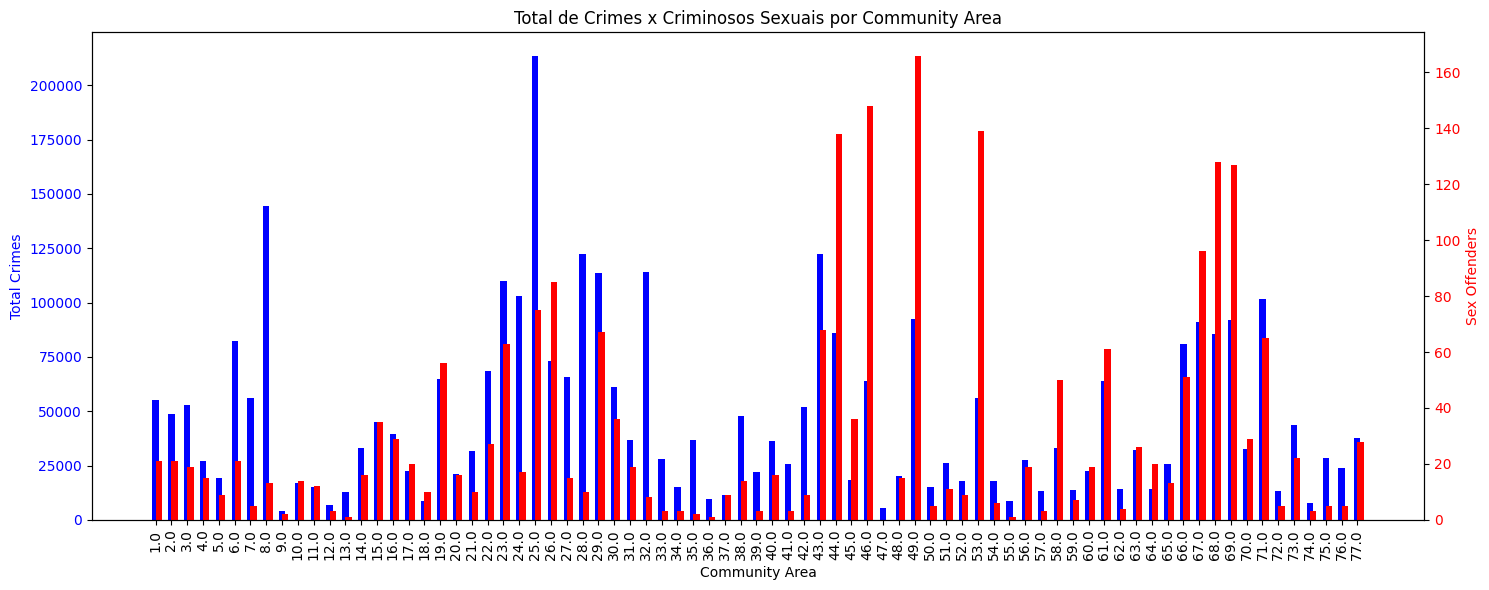

In [27]:
import matplotlib.pyplot as plt

# Contagem de crimes totais por Community
crimes_validos = crimes.dropna(subset=['Community Area'])
# Eliminação de linhas sem community area
crimes_por_area = crimes_validos['Community Area'].value_counts().sort_index()
print('Quantidade de crimes gerais por Community Area:',crimes_por_area)

# Contagem de criminosos sexuais por community
criminosos_validos= sex_offenders.dropna(subset=['Community Area'])
criminosos_por_area = criminosos_validos['Community Area'].value_counts().sort_index()
print('Quantidade de criminosos sexuais por Community Area:', criminosos_por_area)

# Gráfico Comparativo com 2 eixo y por causa da discrepância numérica entre os dados comparados
df_comparativo = pd.DataFrame({
    'Total Crimes': crimes_por_area,
    'Sex Offenders': criminosos_por_area
})
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.bar(df_comparativo.index.astype(str), df_comparativo['Total Crimes'], color='blue', width=0.4, label='Total Crimes')
ax1.set_xlabel('Community Area')
ax1.set_ylabel('Total Crimes', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(df_comparativo.index.astype(str), rotation=90)
ax2 = ax1.twinx()
ax2.bar(df_comparativo.index.astype(str), df_comparativo['Sex Offenders'], color='red', width=0.4, label='Sex Offenders', align='edge')
ax2.set_ylabel('Sex Offenders', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Total de Crimes x Criminosos Sexuais por Community Area')
plt.tight_layout()
plt.show()


Nas "Community Areas" com maior número de criminosos sexuais, quais são os tipos de crimes mais prevalentes e os perfis demográficos (raça, gênero) dos criminosos sexuais que vivem nessas áreas?


In [28]:
criminosos_por_area = criminosos_validos['Community Area'].value_counts().sort_index()
media_criminosos_por_area= criminosos_por_area.mean()
print('Média de criminosos por Community Area:', media_criminosos_por_area)
moda_criminosos_por_area= criminosos_por_area.mode()
print('Moda de criminosos por Community Area:', moda_criminosos_por_area)
media_criminosos_por_area= criminosos_por_area.median()
print('Mediana de criminosos por Community Area:', media_criminosos_por_area)
cv_criminosos_por_area = (criminosos_por_area.std() / criminosos_por_area.mean()) * 100 # Coeficiente de Variação
print(f'Coeficiente de Variação (CV): {cv_criminosos_por_area:.2f}%')

Média de criminosos por Community Area: 31.06578947368421
Moda de criminosos por Community Area: 0    3
Name: count, dtype: int64
Mediana de criminosos por Community Area: 16.0
Coeficiente de Variação (CV): 125.38%


Distribuição desbalanceada: poucas áreas têm números muito altos e a maioria tem números baixos de criminosos sexuais.

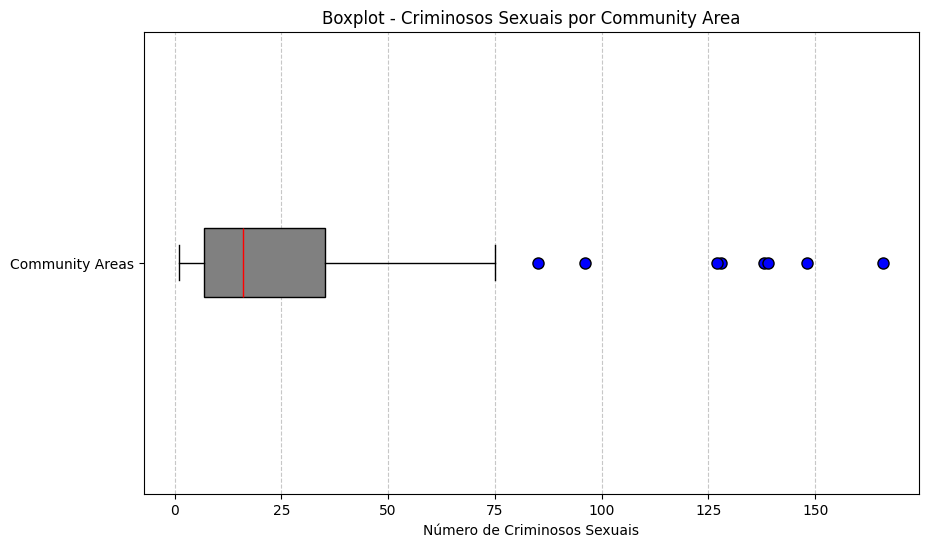

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# Boxplot da quantidade de criminosos sexuais por Community Area
plt.figure(figsize=(10, 6))
plt.boxplot(criminosos_por_area, vert=False, patch_artist=True,
            boxprops=dict(facecolor='grey', color='black'),
            medianprops=dict(color='red'),
            flierprops=dict(markerfacecolor='blue', marker='o', markersize=8, linestyle='none'))

plt.title('Boxplot - Criminosos Sexuais por Community Area')
plt.xlabel('Número de Criminosos Sexuais')
plt.yticks([1], ['Community Areas'])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


35.25


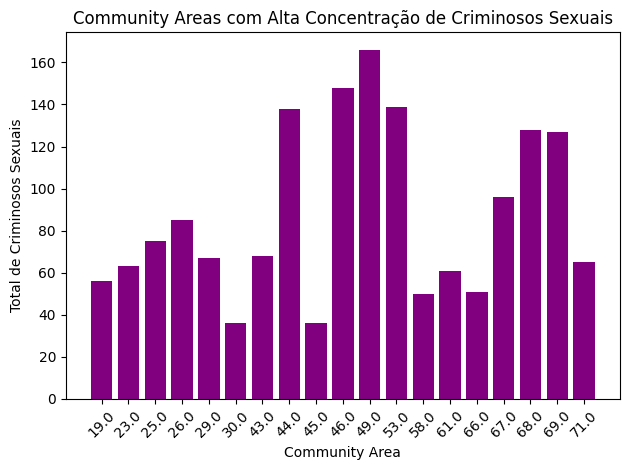

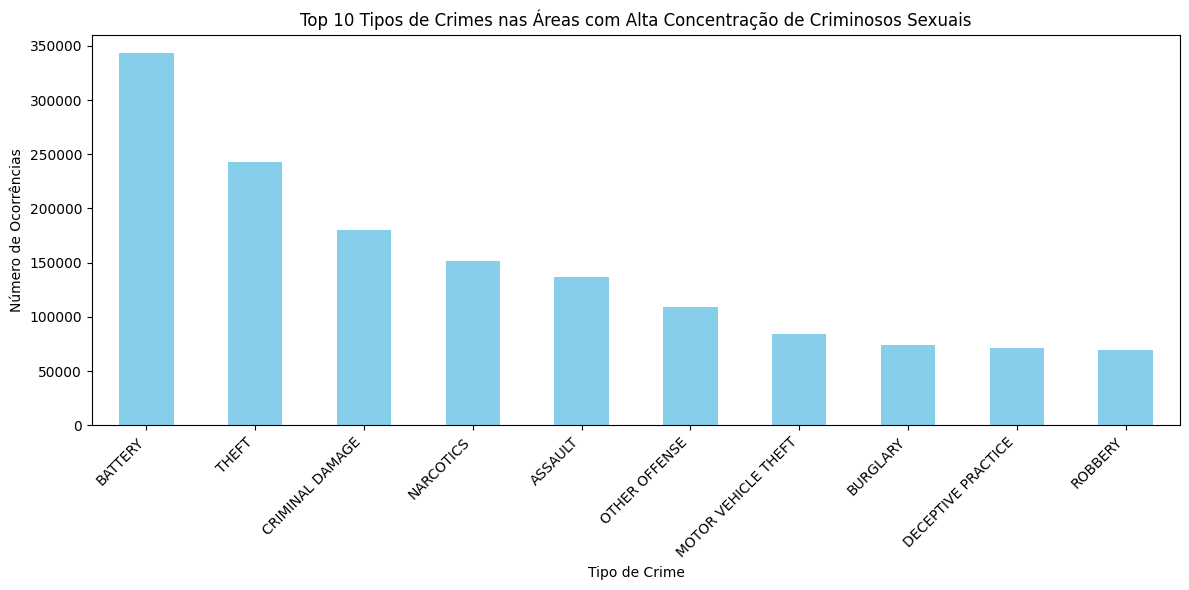


GENDER
MALE      1634
FEMALE      21
Name: count, dtype: int64
RACE
BLACK                           963
WHITE                           377
WHITE HISPANIC                  294
BLACK HISPANIC                   10
ASIAN / PACIFIC ISLANDER          7
UNKNOWN / REFUSED                 3
AMER INDIAN / ALASKAN NATIVE      1
Name: count, dtype: int64

Categorias de Raça Disponíveis: ['BLACK', 'WHITE', 'WHITE HISPANIC', 'BLACK HISPANIC', 'ASIAN / PACIFIC ISLANDER', 'UNKNOWN / REFUSED', 'AMER INDIAN / ALASKAN NATIVE']
Categories (7, object): ['AMER INDIAN / ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC',
                         'UNKNOWN / REFUSED', 'WHITE', 'WHITE HISPANIC']



RACE,AMER INDIAN/ALASKAN NATIVE,ASIAN/PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC,UNKNOWN/REFUSED
GENDER,,,,,,,
FEMALE,0.0,0.0,57.1,0.0,33.3,9.5,0.0
MALE,0.0,0.0,58.2,0.6,22.6,17.9,0.0


In [30]:
limiar_alta_concentracao = criminosos_por_area.quantile(0.75)
print(limiar_alta_concentracao)

# Tabela com 'Community Areas' com n° de criminosos> limiar_alta_concentracao
areas_alta_concentracao = criminosos_por_area[criminosos_por_area > limiar_alta_concentracao]
import matplotlib.pyplot as plt

# Gráfico de barras para áreas com alta concentração de criminosos sexuais
plt.bar(areas_alta_concentracao.index.astype(str),
        areas_alta_concentracao.values,
        color='purple')

plt.title('Community Areas com Alta Concentração de Criminosos Sexuais')
plt.xlabel('Community Area')
plt.ylabel('Total de Criminosos Sexuais')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print()
# Identificando crimes nessas áreas de alta concentração de criminosos sexuais
crimes_nas_areas = crimes[crimes['Community Area'].isin(areas_alta_concentracao.index)]
tipos_crimes_nas_areas = crimes_nas_areas['Primary Type'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
tipos_crimes_nas_areas.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Tipos de Crimes nas Áreas com Alta Concentração de Criminosos Sexuais')
plt.xlabel('Tipo de Crime')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print()
# Perfis demográficos dos criminosos sexuais nessas áreas de alta concentração
criminosos_nas_areas = criminosos_validos[criminosos_validos['Community Area'].isin(areas_alta_concentracao.index)]
# Quantidade dos perfis
genero_criminosos_nas_areas= criminosos_nas_areas['GENDER'].value_counts()
raça_criminosos_nas_areas= criminosos_nas_areas['RACE'].value_counts()
print(genero_criminosos_nas_areas)
print(raça_criminosos_nas_areas)
print()
# Tabela: Percentual de Criminosos por Gênero e Raça
print("Categorias de Raça Disponíveis:", criminosos_nas_areas['RACE'].unique())
ordem_colunas = [
    'AMER INDIAN/ALASKAN NATIVE',
    'ASIAN/PACIFIC ISLANDER',
    'BLACK',
    'BLACK HISPANIC',
    'WHITE',
    'WHITE HISPANIC',
    'UNKNOWN/REFUSED'
]

tabela_genero_area = pd.crosstab(
    criminosos_nas_areas['GENDER'],
    criminosos_nas_areas['RACE'],
    normalize='index'
) * 100
for col in ordem_colunas:
    if col not in tabela_genero_area.columns:
        tabela_genero_area[col] = 0.0
tabela_genero_area = tabela_genero_area[ordem_colunas]
print()
display(
    tabela_genero_area.style
    .format("{:.1f}")
    .set_caption("Perfil Demográfico dos Criminosos Sexuais por Gênero e Raça (Por Percentual)")
)

Quais faixas etárias de criminosos sexuais estão mais associadas a vítimas menores (VICTIM MINOR = TRUE) e como essas faixas se distribuem geograficamente por Community Area?

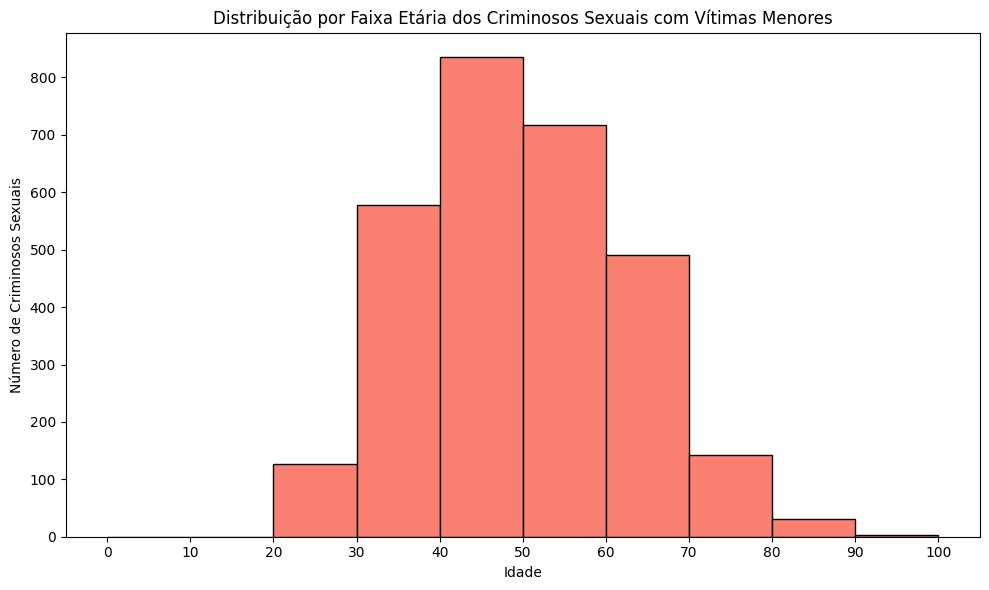

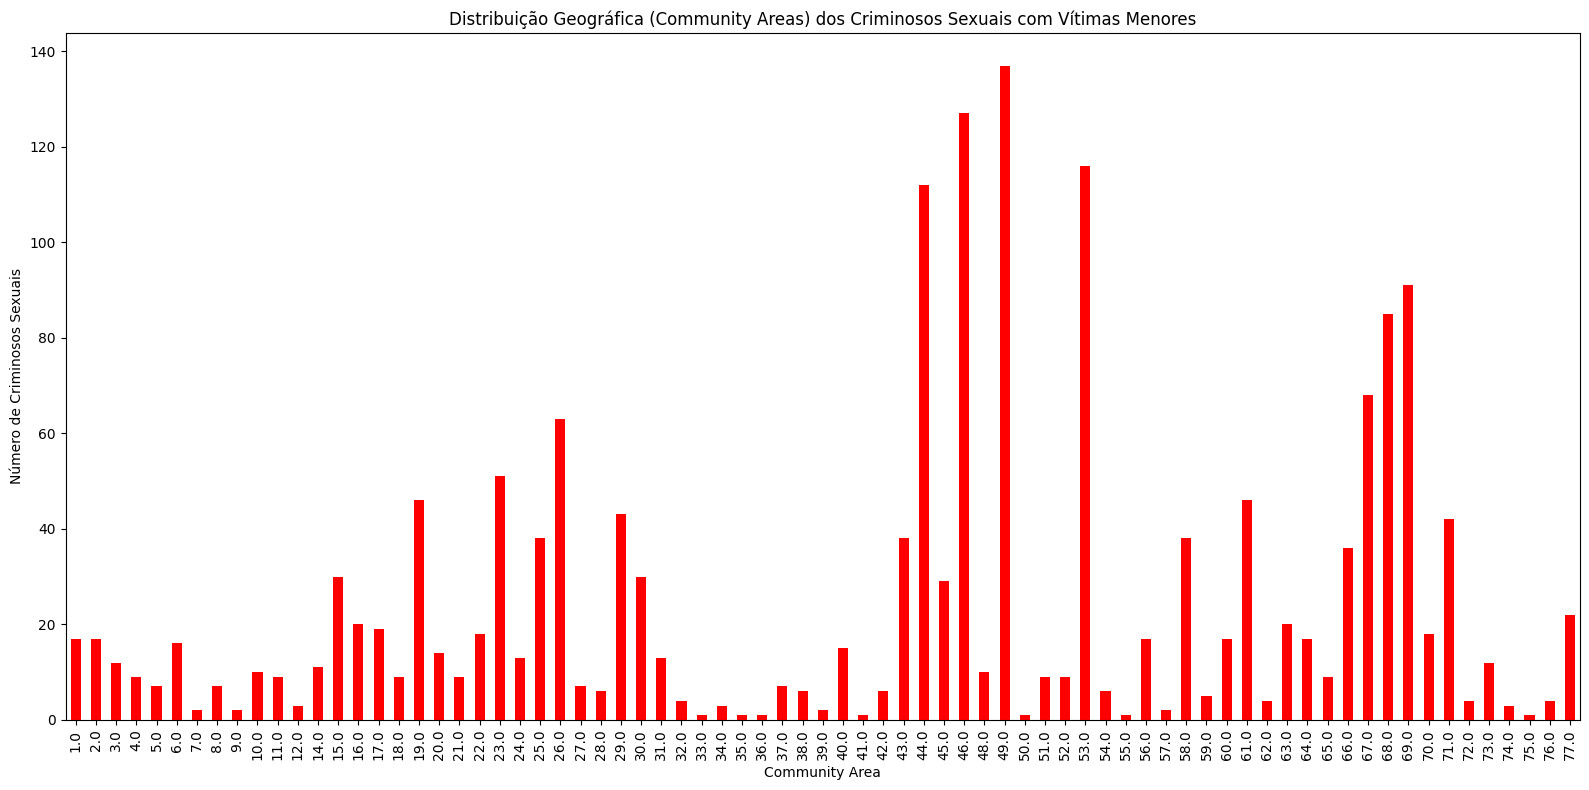

In [31]:
# Cálculo da idade dos criminosos registrados
data_atual = pd.to_datetime("today")
sex_offenders['IDADE'] = (data_atual - sex_offenders['BIRTH DATE']).dt.days // 365
print()
# Separação de criminosos onde 'VICTIM MINOR'== Y
infratores_vitima_menor = sex_offenders[sex_offenders['VICTIM MINOR'] == 'Y']
#Histograma
plt.figure(figsize=(10,6))
plt.hist(infratores_vitima_menor['IDADE'], bins=range(0, 101, 10), color='salmon', edgecolor='black')
plt.title('Distribuição por Faixa Etária dos Criminosos Sexuais com Vítimas Menores')
plt.xlabel('Idade')
plt.ylabel('Número de Criminosos Sexuais')
plt.xticks(range(0, 101, 10))
plt.tight_layout()
plt.show()
print()
# Distribuição geográfica desses criminosos
contagem_faixas_area = infratores_vitima_menor['Community Area'].value_counts().sort_index()
plt.figure(figsize=(16, 8))
contagem_faixas_area.plot(kind='bar', color='red')
plt.title('Distribuição Geográfica (Community Areas) dos Criminosos Sexuais com Vítimas Menores')
plt.xlabel('Community Area')
plt.ylabel('Número de Criminosos Sexuais')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Qual a distribuição dos criminosos sexuais registrados com vítima menor em relação a distribuição dos criminosos sexuais sem vítima menor, por idade?

<Figure size 1200x700 with 0 Axes>

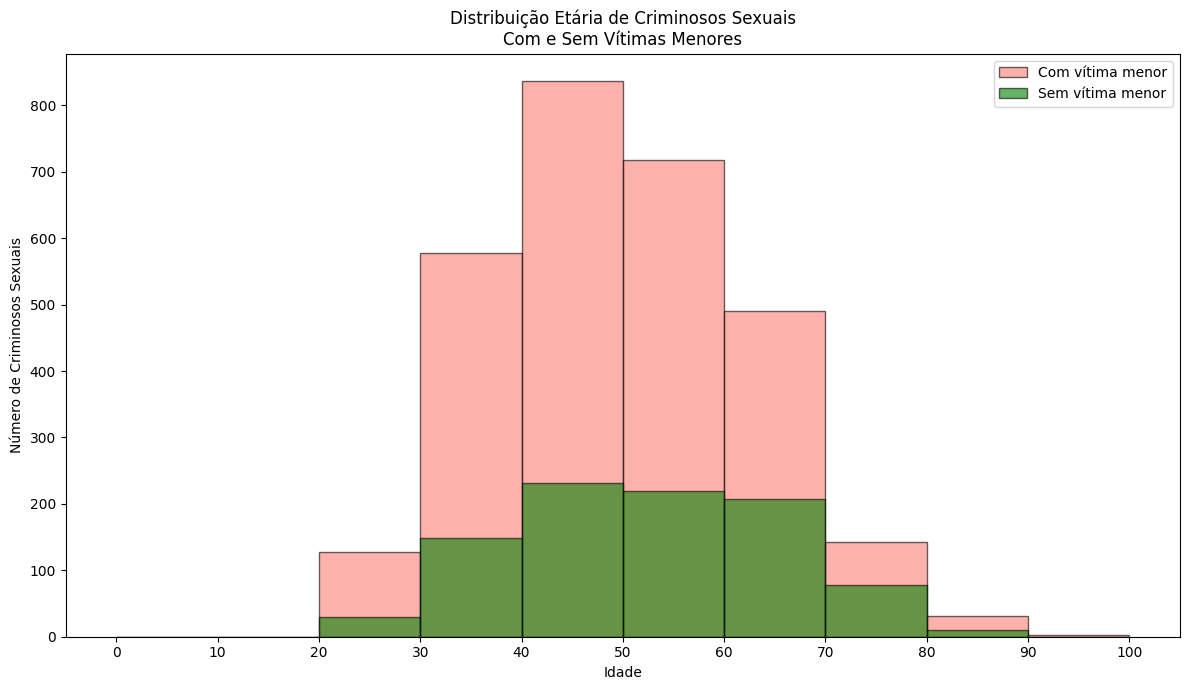


Tabela de Contingência (Faixa Etária x Vítima Menor):
VICTIM MINOR    N    Y
Faixa Etária          
20-29          29  127
30-39         148  578
40-49         231  836
50-59         220  717
60-69         208  491
70-79          78  142
80+            10   34

Teste do Qui-Quadrado:
Estatística Qui² = 39.6319
p-valor = 0.0000
Graus de liberdade = 6


In [32]:
from scipy.stats import chi2_contingency

# Cálculo da idade dos criminosos registrados
data_atual = pd.to_datetime("today")
sex_offenders['IDADE'] = (data_atual - sex_offenders['BIRTH DATE']).dt.days // 365
print()
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']  # Correto! (8 labels)
sex_offenders['Faixa Etária'] = pd.cut(sex_offenders['IDADE'], bins=bins, labels=labels, right=False)
# Separação de criminosos onde 'VICTIM MINOR'== Y
infratores_vitima_menor = sex_offenders[sex_offenders['VICTIM MINOR'] == 'Y']
# Separação de criminosos onde 'VICTIM MINOR'== N
infratores_sem_vitima_menor = sex_offenders[sex_offenders['VICTIM MINOR'] == 'N']
plt.figure(figsize=(12, 7))
# Histograma para criminosos com vítimas menores
plt.figure(figsize=(12, 7))
plt.hist(infratores_vitima_menor['IDADE'], bins=range(0, 101, 10),
         alpha=0.6, label='Com vítima menor', color='salmon', edgecolor='black')
plt.hist(infratores_sem_vitima_menor['IDADE'], bins=range(0, 101, 10),
         alpha=0.6, label='Sem vítima menor', color='green', edgecolor='black')
plt.title('Distribuição Etária de Criminosos Sexuais\nCom e Sem Vítimas Menores')
plt.xlabel('Idade')
plt.ylabel('Número de Criminosos Sexuais')
plt.xticks(range(0, 101, 10))
plt.legend()
plt.tight_layout()
plt.show()
#tabela de contingência
tabela = pd.crosstab(sex_offenders['Faixa Etária'], sex_offenders['VICTIM MINOR'])
print("\nTabela de Contingência (Faixa Etária x Vítima Menor):")
print(tabela)

chi2, p_value, dof, expected = chi2_contingency(tabela)
print(f"\nTeste do Qui-Quadrado:")
print(f"Estatística Qui² = {chi2:.4f}")
print(f"p-valor = {p_value:.4f}")
print(f"Graus de liberdade = {dof}")

A média anual de crimes é diferente entre as 'Community Areas' com uma proporção maior de criminosos sexuais registrados versus aqueles com uma proporção menor?


In [33]:
from scipy.stats import shapiro, mannwhitneyu
#Cálculo de crimes em áreas com uma concentração 'BAIXA' de criminosos sexuais
limiar_alta_concentracao = criminosos_por_area.quantile(0.75)
areas_baixa_concentracao = criminosos_por_area[criminosos_por_area <= limiar_alta_concentracao].index
crimes_nas_areas_baixa = crimes[crimes['Community Area'].isin(areas_baixa_concentracao)]
media_anual_crimes_baixa = crimes_nas_areas_baixa.groupby('Year').size().mean()
print(f"Média anual de crimes gerais nas Community Areas com baixa concentração de criminosos sexuais: {media_anual_crimes_baixa:.2f}")
#Cálculo de crimes em áreas com uma concentração 'ALTA' de criminosos sexuais
areas_alta_concentracao = criminosos_por_area[criminosos_por_area > limiar_alta_concentracao].index
crimes_nas_areas_alta = crimes[crimes['Community Area'].isin(areas_alta_concentracao)]
media_anual_crimes_alta = crimes_nas_areas_alta.groupby('Year').size().mean()
print(f"Média anual de crimes gerais nas Community Areas com alta concentração de criminosos sexuais: {media_anual_crimes_alta:.2f}")
#Teste de shapiro - normalidade
print("Normalidade - Áreas com baixa concentração:")
print(shapiro(crimes_nas_areas_baixa.groupby('Year').size()))
print("Normalidade - Áreas com alta concentração:")
print(shapiro(crimes_nas_areas_alta.groupby('Year').size()))
# Teste Mann-Whitney U
media_anual_baixa = crimes_nas_areas_baixa.groupby('Year').size()
media_anual_alta = crimes_nas_areas_alta.groupby('Year').size()
stat, p_value = mannwhitneyu(media_anual_baixa, media_anual_alta, alternative='two-sided')
print(f'Teste de Mann-Whitney U:\nEstatística U = {stat}, p-valor = {p_value}')

Média anual de crimes gerais nas Community Areas com baixa concentração de criminosos sexuais: 132986.93
Média anual de crimes gerais nas Community Areas com alta concentração de criminosos sexuais: 108193.47
Normalidade - Áreas com baixa concentração:
ShapiroResult(statistic=np.float64(0.7959629831829911), pvalue=np.float64(0.0032644538889512018))
Normalidade - Áreas com alta concentração:
ShapiroResult(statistic=np.float64(0.891362919797989), pvalue=np.float64(0.07032169455696578))
Teste de Mann-Whitney U:
Estatística U = 170.0, p-valor = 0.01806662299891238


A probabilidade de um crime sexual ocorrer em uma “Community Area” que existe mais de um criminoso sexual registrado é maior que com “Community Areas” que possuem menos de um criminoso sexual registrado?

In [34]:
#Separação das áreas com mais ou menos de 1 criminoso sexual registrado
areas_mais_de_um_criminoso = criminosos_por_area[criminosos_por_area > 1].index
areas_um_ou_menos_criminosos = criminosos_por_area[criminosos_por_area <= 1].index
#Identificação de como foram registrados os crimes sexuais no csv "Crimes- 2001 to Present"
tipos_sexuais = [crime for crime in crimes['Primary Type'].unique() if 'SEX' in crime.upper() or 'ASSAULT' in crime.upper()]
tipos_sexuais = ['SEX OFFENSE','CRIMINAL SEXUAL ASSAULT','CRIM SEXUAL ASSAULT']
#Contagem de números de criminosos sexuais por Community Area
crimes_sexuais = crimes[crimes['Primary Type'].isin(tipos_sexuais)]
crimes_sexuais_areas_maior = crimes_sexuais[crimes_sexuais['Community Area'].isin(areas_mais_de_um_criminoso)]
total_crimes_maior = len(crimes_sexuais_areas_maior)
crimes_sexuais_areas_menor = crimes_sexuais[crimes_sexuais['Community Area'].isin(areas_um_ou_menos_criminosos)]
total_crimes_menor = len(crimes_sexuais_areas_menor)
#Cálculo das probabilidades
total_areas_maior = len(areas_mais_de_um_criminoso)
total_areas_menor = len(areas_um_ou_menos_criminosos)
prob_maior = total_crimes_maior / total_areas_maior
prob_menor = total_crimes_menor / total_areas_menor
print(f"Probabilidade de um crime sexual ocorrer em “Community Areas” com mais de 1 criminoso registrado: {prob_maior:.2f}")
print(f"Probabilidade de um crime sexual ocorrer em “Community Areas” com 1 ou nenhum criminoso registrado: {prob_menor:.2f}")

Probabilidade de um crime sexual ocorrer em “Community Areas” com mais de 1 criminoso registrado: 499.18
Probabilidade de um crime sexual ocorrer em “Community Areas” com 1 ou nenhum criminoso registrado: 110.00


Qual é o perfil demográfico (idade, raça, gênero) dos infratores sexuais que tiveram vítimas menores? Existem diferenças notáveis nesses perfis em comparação com infratores que não tiveram vítimas menores?

In [35]:
#Identificação dos perfis dos criminosos sexuais com vítimas menores de idade
infratores_vitima_menor = sex_offenders[sex_offenders['VICTIM MINOR'] == 'Y']
genero_contagem = infratores_vitima_menor['GENDER'].value_counts()
print(genero_contagem)
print()
raça_contagem = infratores_vitima_menor['RACE'].value_counts()
print(raça_contagem)
print()
from IPython.display import display
tabela_genero_raca = pd.crosstab(
    infratores_vitima_menor['GENDER'],
    infratores_vitima_menor['RACE'],
    normalize='index'
) * 100
display(
    tabela_genero_raca.style.format("{:.1f}")
    .set_caption("Perfil Demográfico (Gênero x Raça) - Criminosos sexuais SEM Vítima Menor (%)")
)
print()
#Identificação dos perfis dos criminosos sexuais sem vítimas menores de idade
infratores_sem_vitima_menor = sex_offenders[sex_offenders['VICTIM MINOR'] == 'N']
genero_contagem = infratores_sem_vitima_menor['GENDER'].value_counts()
print("\nDistribuição por Gênero:")
print(genero_contagem)
print()
raca_contagem = infratores_sem_vitima_menor['RACE'].value_counts()
print("\nDistribuição por Raça:")
print(raca_contagem)
print()
tabela_genero_raca = pd.crosstab(
    infratores_sem_vitima_menor['GENDER'],
    infratores_sem_vitima_menor['RACE'],
    normalize='index'
) * 100
display(
    tabela_genero_raca.style.format("{:.1f}")
    .set_caption("Perfil Demográfico (Gênero x Raça) - Criminosos sexuais SEM Vítima Menor (%)")
)
print()
from scipy.stats import chi2_contingency, fisher_exact
# Teste Qui-Quadrado - Gênero x Vítima Menor
tabela_genero = pd.crosstab(sex_offenders['GENDER'], sex_offenders['VICTIM MINOR'])
print("\nTabela de contingência - Gênero x Vítima Menor:")
print(tabela_genero)
stat, p, dof, expected = chi2_contingency(tabela_genero)
print(f"\nTeste Qui-Quadrado (Gênero x Vítima Menor):")
print(f"Estatística Qui²: {stat:.4f}, p-valor: {p:.4f}, graus de liberdade: {dof}")
print()
# Teste Qui-Quadrado - Raça x Vítima Menor
tabela_raca = pd.crosstab(sex_offenders['RACE'], sex_offenders['VICTIM MINOR'])
print("\nTabela de contingência - Raça x Vítima Menor:")
print(tabela_raca)
stat, p, dof, expected = chi2_contingency(tabela_raca)
print(f"\nTeste Qui-Quadrado (Raça x Vítima Menor):")
print(f"Estatística Qui²: {stat:.4f}, p-valor: {p:.4f}, graus de liberdade: {dof}")

GENDER
MALE      2865
FEMALE      60
Name: count, dtype: int64

RACE
BLACK                           1516
WHITE                            753
WHITE HISPANIC                   599
ASIAN / PACIFIC ISLANDER          30
BLACK HISPANIC                    16
UNKNOWN / REFUSED                  8
AMER INDIAN / ALASKAN NATIVE       3
Name: count, dtype: int64



RACE,AMER INDIAN / ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,UNKNOWN / REFUSED,WHITE,WHITE HISPANIC
GENDER,,,,,,,
FEMALE,0.0,0.0,55.0,0.0,0.0,33.3,11.7
MALE,0.1,1.0,51.8,0.6,0.3,25.6,20.7




Distribuição por Gênero:
GENDER
MALE      918
FEMALE      6
Name: count, dtype: int64


Distribuição por Raça:
RACE
BLACK                           633
WHITE                           161
WHITE HISPANIC                  113
ASIAN / PACIFIC ISLANDER         11
BLACK HISPANIC                    5
UNKNOWN / REFUSED                 1
AMER INDIAN / ALASKAN NATIVE      0
Name: count, dtype: int64



RACE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,UNKNOWN / REFUSED,WHITE,WHITE HISPANIC
GENDER,,,,,,
FEMALE,0.0,33.3,0.0,0.0,33.3,33.3
MALE,1.2,68.7,0.5,0.1,17.3,12.1




Tabela de contingência - Gênero x Vítima Menor:
VICTIM MINOR    N     Y
GENDER                 
FEMALE          6    60
MALE          918  2865

Teste Qui-Quadrado (Gênero x Vítima Menor):
Estatística Qui²: 7.3781, p-valor: 0.0066, graus de liberdade: 1


Tabela de contingência - Raça x Vítima Menor:
VICTIM MINOR                    N     Y
RACE                                   
AMER INDIAN / ALASKAN NATIVE    0     3
ASIAN / PACIFIC ISLANDER       11    30
BLACK                         633  1516
BLACK HISPANIC                  5    16
UNKNOWN / REFUSED               1     8
WHITE                         161   753
WHITE HISPANIC                113   599

Teste Qui-Quadrado (Raça x Vítima Menor):
Estatística Qui²: 83.2244, p-valor: 0.0000, graus de liberdade: 6


Como a distribuição dos diferentes tipos de "Primary Type" de crimes se difere entre as Community Areas com alta e baixa concentração de criminosos sexuais registrados?


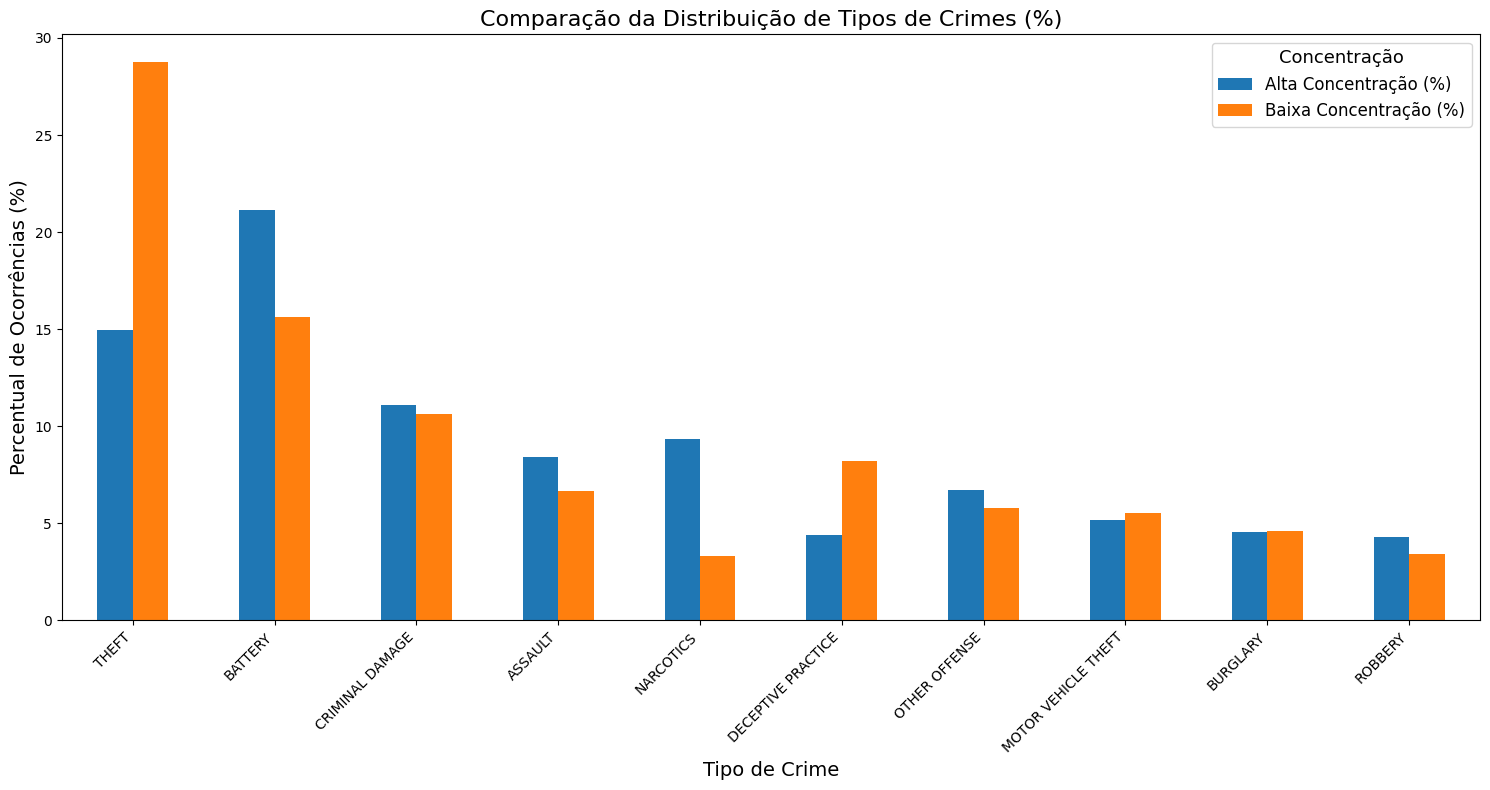


Community Area         Alta   Baixa
Primary Type                       
ASSAULT              136826  133310
BATTERY              343023  312367
BURGLARY              74181   92371
CRIMINAL DAMAGE      180296  213063
DECEPTIVE PRACTICE    71194  163625
MOTOR VEHICLE THEFT   84172  110925
NARCOTICS            151380   66802
OTHER OFFENSE        108817  116121
ROBBERY               69391   68213
THEFT                242528  574297

Teste Qui-Quadrado:
Estatística Qui²: 170648.5885
p-valor: 0.0000
Graus de liberdade: 9


In [36]:
import matplotlib.pyplot as plt

#Separação das áreas por alta ou baixa concentração de criminosos sexuais registrados
limiar_alta_concentracao = criminosos_por_area.quantile(0.75)
areas_alta_concentracao = criminosos_por_area[criminosos_por_area > limiar_alta_concentracao].index
areas_baixa_concentracao = criminosos_por_area[criminosos_por_area <= limiar_alta_concentracao].index
#Cálculo da quantidade de crimes por área de alta ou baixa concentração de criminosos sexuais registrados
crimes_alta = crimes[crimes['Community Area'].isin(areas_alta_concentracao)]
crimes_baixa = crimes[crimes['Community Area'].isin(areas_baixa_concentracao)]
# Distribuição percentual por tipo de crime
distribuicao_alta = crimes_alta['Primary Type'].value_counts(normalize=True) * 100
distribuicao_baixa = crimes_baixa['Primary Type'].value_counts(normalize=True) * 100
#Construção do gráfico comparativo
df_comparacao = pd.DataFrame({
    'Alta Concentração (%)': distribuicao_alta,
    'Baixa Concentração (%)': distribuicao_baixa
}).fillna(0).sort_values(by='Alta Concentração (%)', ascending=False)

top_crimes = df_comparacao.sum(axis=1).sort_values(ascending=False).head(10).index
df_top = df_comparacao.loc[top_crimes]

ax = df_top.plot(kind='bar', figsize=(15, 8))
plt.title("Comparação da Distribuição de Tipos de Crimes (%)", fontsize=16)
plt.xlabel("Tipo de Crime", fontsize=14)
plt.ylabel("Percentual de Ocorrências (%)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Concentração', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()
print()
from scipy.stats import chi2_contingency
#Teste de hipótese: Qui-Quadrado
tabela_top = pd.crosstab(
    crimes[crimes['Primary Type'].isin(top_crimes)]['Primary Type'],
    crimes['Community Area'].isin(areas_alta_concentracao).map({True: 'Alta', False: 'Baixa'})
)
print(tabela_top)
stat, p, dof, expected = chi2_contingency(tabela_top)
print(f"\nTeste Qui-Quadrado:")
print(f"Estatística Qui²: {stat:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Graus de liberdade: {dof}")


Qual a quantidade de criminosos sexuais registrados por 'Community Area'?

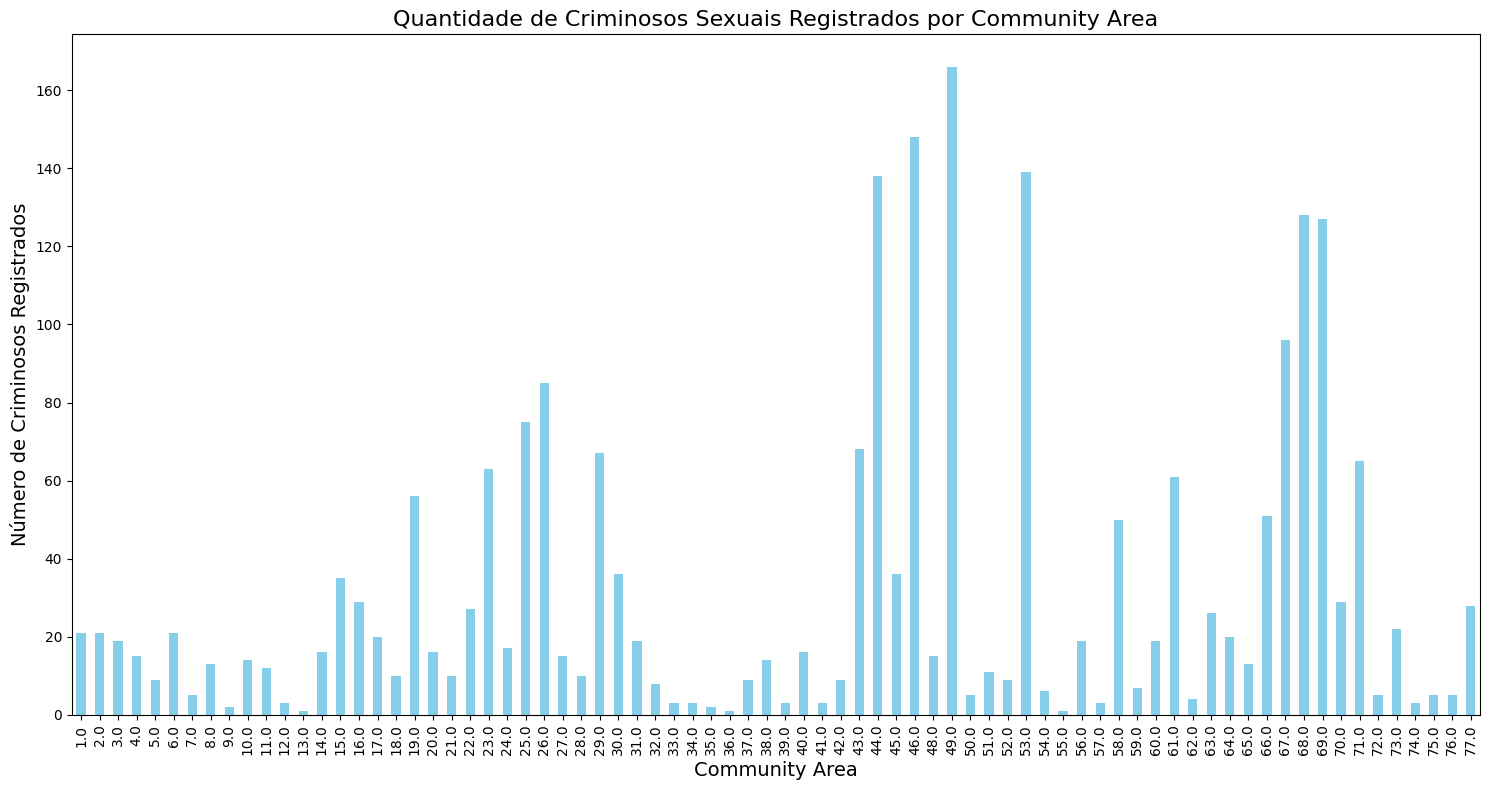

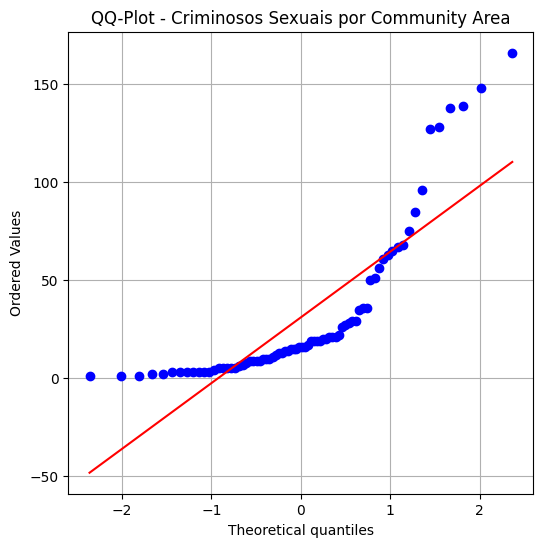


Teste de Normalidade (Shapiro-Wilk):
Estatística: 0.7146, p-valor: 0.0000



In [26]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot
import seaborn as sns

criminosos_por_area = criminosos_validos['Community Area'].value_counts().sort_index()
#Gráfico
plt.figure(figsize=(15, 8))
criminosos_por_area.plot(kind='bar', color='skyblue')
plt.title("Quantidade de Criminosos Sexuais Registrados por Community Area", fontsize=16)
plt.xlabel("Community Area", fontsize=14)
plt.ylabel("Número de Criminosos Registrados", fontsize=14)
plt.xticks(rotation=90)  # Rotaciona para evitar sobreposição
plt.tight_layout()
plt.show()
print()
#Verificação de normalidade da distribuição:
# QQ-Plot
plt.figure(figsize=(6, 6))
probplot(criminosos_por_area.values, dist="norm", plot=plt)
plt.title("QQ-Plot - Criminosos Sexuais por Community Area")
plt.grid(True)
plt.show()
print()
# Teste de Shapiro-Wilk
print("Teste de Normalidade (Shapiro-Wilk):")
stat, p_value = shapiro(criminosos_por_area.values)
print(f"Estatística: {stat:.4f}, p-valor: {p_value:.4f}")
print()

Há relação entre a tendência no número de crimes sexuais ocorridos com o número de crimes gerais ao longo dos anos

      Crimes Não Sexuais  Crimes Sexuais
Year                                    
2011               85338             603
2012              333769            2557
2013              305160            2416
2014              273443            2419
2015              262359            2512
2016              267263            2684
2017              266490            2768
2018              266091            3007
2019              258564            3050
2020              210349            2239
2021              206828            2640
2022              236963            2832
2023              259972            3022
2024              255506            2826
2025               98023            1242
Correlação entre crimes não sexuais e crimes sexuais ao longo dos anos (r): 0.82


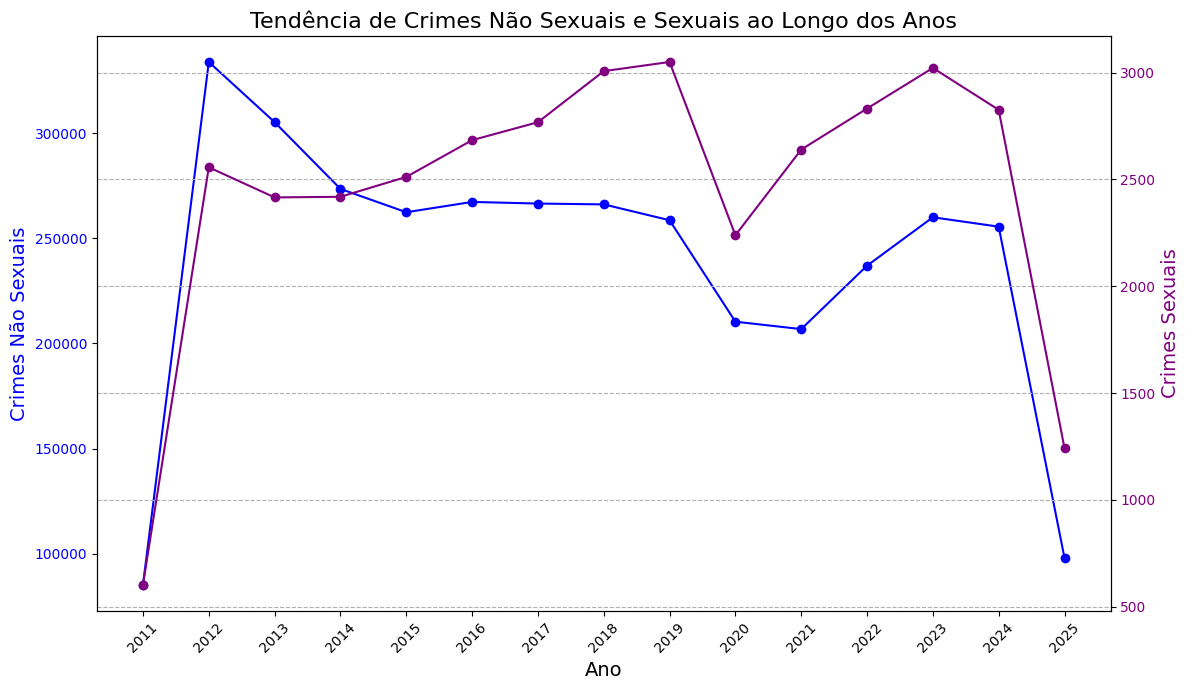

In [37]:
#Contagem do número de crimes sexuais
tipos_sexuais = ['SEX OFFENSE','CRIMINAL SEXUAL ASSAULT','CRIM SEXUAL ASSAULT']
crimes_sexuais = crimes_validos[crimes_validos['Primary Type'].isin(tipos_sexuais)]
#Contagem do número de crimes não sexuais
crimes_nao_sexuais = crimes_validos[~crimes_validos['Primary Type'].isin(tipos_sexuais)]
#Separação por ano
crimes_sexuais_por_ano = crimes_sexuais['Year'].value_counts().sort_index()
crimes_nao_sexuais_por_ano = crimes_nao_sexuais['Year'].value_counts().sort_index()

df_tendencia = pd.DataFrame({
    'Crimes Não Sexuais': crimes_nao_sexuais_por_ano,
    'Crimes Sexuais': crimes_sexuais_por_ano
}).fillna(0).astype(int)

print(df_tendencia)

#Correlação:
correlacao = df_tendencia['Crimes Não Sexuais'].corr(df_tendencia['Crimes Sexuais'])
print(f"Correlação entre crimes não sexuais e crimes sexuais ao longo dos anos (r): {correlacao:.2f}")

fig, ax1 = plt.subplots(figsize=(12, 7))

ax1.plot(df_tendencia.index, df_tendencia['Crimes Não Sexuais'], marker='o', color='blue', label='Crimes Não Sexuais')
ax1.set_xlabel('Ano', fontsize=14)
ax1.set_ylabel('Crimes Não Sexuais', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(df_tendencia.index, df_tendencia['Crimes Sexuais'], marker='o', color='purple', label='Crimes Sexuais')
ax2.set_ylabel('Crimes Sexuais', color='purple', fontsize=14)
ax2.tick_params(axis='y', labelcolor='purple')
ax1.set_xticks(df_tendencia.index)
ax1.set_xticklabels(df_tendencia.index, rotation=45)
plt.title('Tendência de Crimes Não Sexuais e Sexuais ao Longo dos Anos', fontsize=16)
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

Como a proporção de crimes sexuais em relação ao total de crimes varia anualmente em Chicago?

      Total de Crimes  Crimes Sexuais  Proporção (%)
Year                                                
2011            85941             603           0.70
2012           336326            2557           0.76
2013           307576            2416           0.79
2014           275862            2419           0.88
2015           264871            2512           0.95
2016           269947            2684           0.99
2017           269258            2768           1.03
2018           269098            3007           1.12
2019           261614            3050           1.17
2020           212588            2239           1.05
2021           209468            2640           1.26
2022           239795            2832           1.18
2023           262994            3022           1.15
2024           258332            2826           1.09
2025            99265            1242           1.25



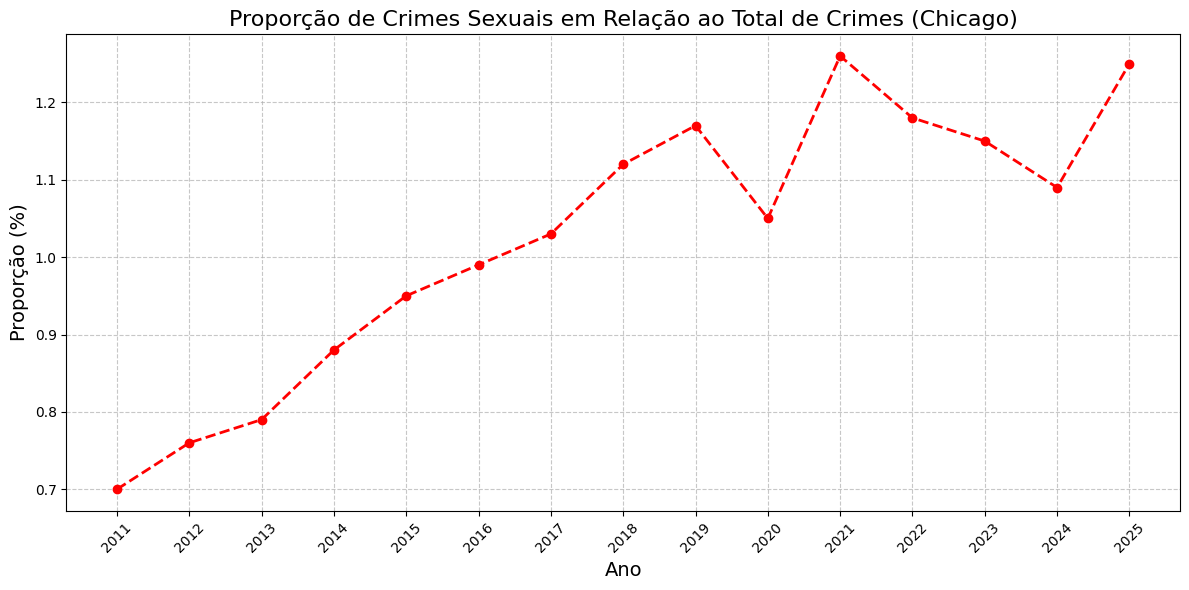

In [38]:
#Filtragem dos tipos de crimes (sexuais e nao sexuais)
tipos_sexuais = ['SEX OFFENSE', 'CRIMINAL SEXUAL ASSAULT', 'CRIM SEXUAL ASSAULT']
crimes_sexuais = crimes_validos[crimes_validos['Primary Type'].isin(tipos_sexuais)]

total_por_ano = crimes_validos['Year'].value_counts().sort_index()
sexuais_por_ano = crimes_sexuais['Year'].value_counts().sort_index()

proporcao_sexual = (sexuais_por_ano / total_por_ano) * 100

df_proporcao = pd.DataFrame({
    'Total de Crimes': total_por_ano,
    'Crimes Sexuais': sexuais_por_ano,
    'Proporção (%)': proporcao_sexual.round(2)
})
print(df_proporcao)
print()
# Gráfico da proporção ao longo dos anos
plt.figure(figsize=(12, 6))
plt.plot(df_proporcao.index, df_proporcao['Proporção (%)'],
         marker='o',
         color='red',
         linestyle='--',
         linewidth=2)

plt.title('Proporção de Crimes Sexuais em Relação ao Total de Crimes (Chicago)', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Proporção (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df_proporcao.index, rotation=45)
plt.tight_layout()
plt.show()

Qual é a taxa de resolução (prisão) para crimes sexuais em comparação com a taxa de resolução para crimes gerais ao longo dos anos?

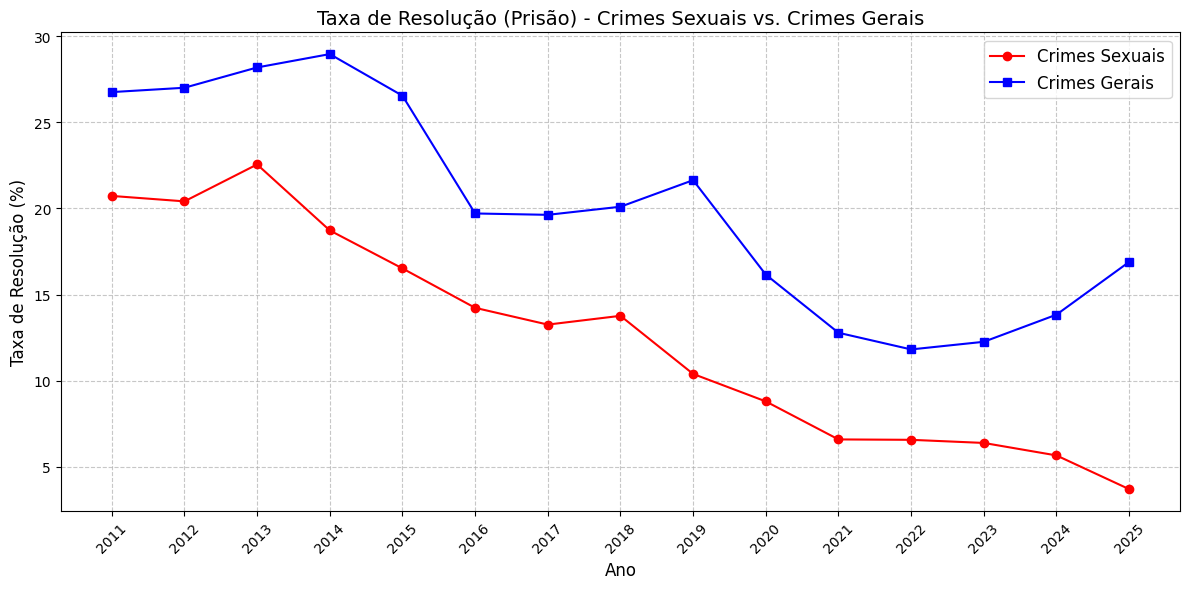

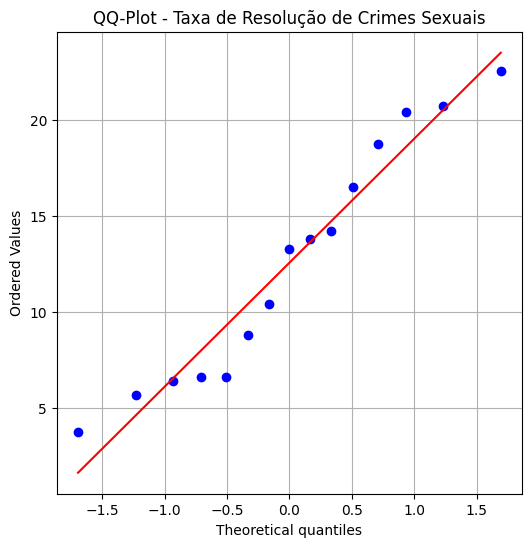

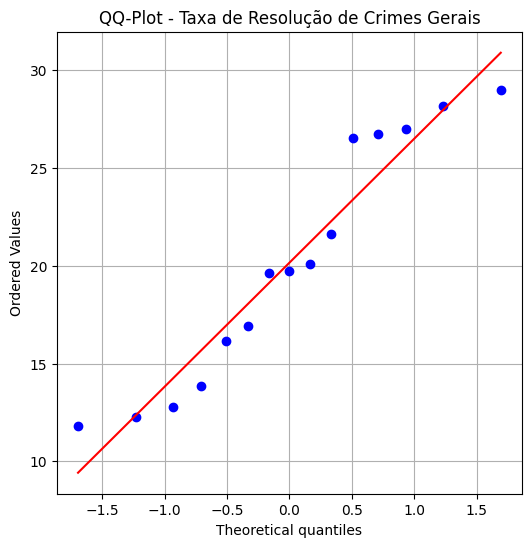


Normalidade - Taxa de Resolução de Crimes Sexuais:
ShapiroResult(statistic=np.float64(0.9304573386292063), pvalue=np.float64(0.2772026362229164))

Normalidade - Taxa de Resolução de Crimes Gerais:
ShapiroResult(statistic=np.float64(0.9081135358327677), pvalue=np.float64(0.12668456361821367))

Teste t pareado:
Estatística t: -12.0678
p-valor: 0.0000


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot
from scipy.stats import ttest_rel
#Filtragem dos crimes em categorias (sexuais ou não sexuais)
tipos_sexuais = ['SEX OFFENSE', 'CRIMINAL SEXUAL ASSAULT', 'CRIM SEXUAL ASSAULT']
crimes_sexuais = crimes_validos[crimes_validos['Primary Type'].isin(tipos_sexuais)]
crimes_gerais = crimes_validos[~crimes_validos['Primary Type'].isin(tipos_sexuais)]
# Contagem dos crimes reportados por ano
reportados_sexuais = crimes_sexuais['Year'].value_counts().sort_index()
reportados_gerais = crimes_gerais['Year'].value_counts().sort_index()
# Contagem dos crimes resolvidos ('Arrest' == true) por ano
resolvidos_sexuais = crimes_sexuais[crimes_sexuais['Arrest'] == True]['Year'].value_counts().sort_index()
resolvidos_gerais = crimes_gerais[crimes_gerais['Arrest'] == True]['Year'].value_counts().sort_index()
#Armazenamento das taxa em 'series'
anos = sorted(crimes_validos['Year'].unique())
taxa_sexuais = pd.Series(index=anos, dtype=float)
taxa_gerais = pd.Series(index=anos, dtype=float)
# Calculo da taxa para cada ano
for ano in anos:
    total_sex = reportados_sexuais.get(ano, 0)  # Se não houver registros, usar 0
    resolvidos_sex = resolvidos_sexuais.get(ano, 0)
    taxa_sexuais[ano] = (resolvidos_sex / total_sex) * 100 if total_sex != 0 else 0
    total_geral = reportados_gerais.get(ano, 0)
    resolvidos_geral = resolvidos_gerais.get(ano, 0)
    taxa_gerais[ano] = (resolvidos_geral / total_geral) * 100 if total_geral != 0 else 0
# Gráfico de linhas para visualização Comparativa
plt.figure(figsize=(12, 6))
plt.plot(taxa_sexuais.index, taxa_sexuais.values, label='Crimes Sexuais', marker='o', color='red')
plt.plot(taxa_gerais.index, taxa_gerais.values, label='Crimes Gerais', marker='s', color='blue')
plt.title('Taxa de Resolução (Prisão) - Crimes Sexuais vs. Crimes Gerais', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Taxa de Resolução (%)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(anos, rotation=45)
plt.tight_layout()
plt.show()
print()
# QQ-Plot para Taxa de Resolução de Crimes Sexuais
plt.figure(figsize=(6,6))
probplot(taxa_sexuais.values, dist="norm", plot=plt)
plt.title('QQ-Plot - Taxa de Resolução de Crimes Sexuais')
plt.grid(True)
plt.show()
print()
# QQ-Plot para Taxa de Resolução de Crimes Gerais
plt.figure(figsize=(6,6))
probplot(taxa_gerais.values, dist="norm", plot=plt)
plt.title('QQ-Plot - Taxa de Resolução de Crimes Gerais')
plt.grid(True)
plt.show()
print()
#Teste de shapiro - normalidade
print("Normalidade - Taxa de Resolução de Crimes Sexuais:")
print(shapiro(taxa_sexuais.values))
print()
print("Normalidade - Taxa de Resolução de Crimes Gerais:")
print(shapiro(taxa_gerais.values))
print()
#Teste t pareado
from scipy.stats import ttest_rel

stat, p = ttest_rel(taxa_sexuais.values, taxa_gerais.values)
print(f"Teste t pareado:")
print(f"Estatística t: {stat:.4f}")
print(f"p-valor: {p:.4f}")


Nas Community Areas com a maior incidência de crimes sexuais, quais são os três tipos de crimes gerais mais comuns, e como isso se compara com as Community Areas de baixa incidência de crimes sexuais?


Áreas com alta incidência: [25, 8, 28, 43, 29]
Áreas com baixa incidência: [37, 18, 12, 47, 9]

Top 3 crimes em áreas de alta incidência:
 Primary Type
THEFT              168879
BATTERY            132562
CRIMINAL DAMAGE     66988
Name: count, dtype: int64

Top 3 crimes em áreas de baixa incidência:
 Primary Type
THEFT              7408
BATTERY            5872
CRIMINAL DAMAGE    4357
Name: count, dtype: int64


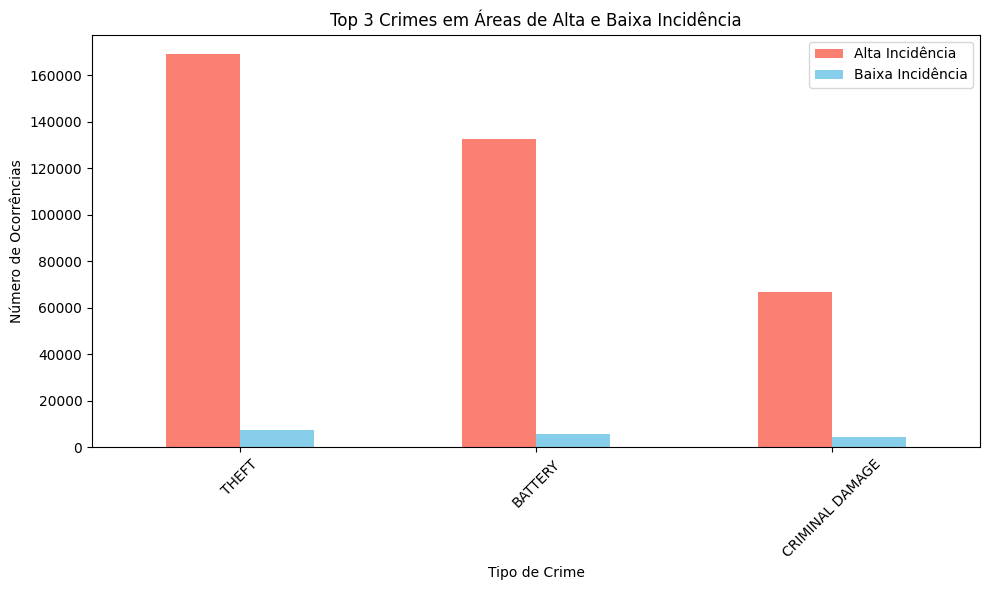



Tabela de Contingência:
 Primary Type       THEFT  BATTERY  CRIMINAL DAMAGE
Alta Incidência   168879   132562            66988
Baixa Incidência    7408     5872             4357


Resultado do Teste Qui-Quadrado:
Estatística Qui-Quadrado: 475.4706
p-valor: 0.0000
Graus de Liberdade: 2


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

tipos_sexuais = ['SEX OFFENSE','CRIMINAL SEXUAL ASSAULT','CRIM SEXUAL ASSAULT']
crimes_sexuais = crimes_validos[crimes_validos['Primary Type'].isin(tipos_sexuais)]
contagem_crimes_sexuais = crimes_sexuais['Community Area'].value_counts()

areas_alta = contagem_crimes_sexuais.head(5).index
areas_baixa = contagem_crimes_sexuais.tail(5).index
print("Áreas com alta incidência:", areas_alta.tolist())
print("Áreas com baixa incidência:", areas_baixa.tolist())

#Identificação dos tipos criminais gerais que mais aparecem em cada categoria
crimes_alta = crimes_validos[crimes_validos['Community Area'].isin(areas_alta)]
crimes_baixa = crimes_validos[crimes_validos['Community Area'].isin(areas_baixa)]
top3_alta = crimes_alta['Primary Type'].value_counts().head(3)
top3_baixa = crimes_baixa['Primary Type'].value_counts().head(3)
print("\nTop 3 crimes em áreas de alta incidência:\n", top3_alta)
print("\nTop 3 crimes em áreas de baixa incidência:\n", top3_baixa)

#Gráfico de barras - visualizar distribuição nos dois tipos
df_plot = pd.DataFrame({
    'Alta Incidência': top3_alta,
    'Baixa Incidência': top3_baixa
}).fillna(0)

df_plot.plot(kind='bar', figsize=(10,6), color=['salmon', 'skyblue'])
plt.title('Top 3 Crimes em Áreas de Alta e Baixa Incidência')
plt.xlabel('Tipo de Crime')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print()
#Tabela de contingência
tabela_contingencia = df_plot.T.astype(int)  # transposta para colocar 'Alta' e 'Baixa' como linhas
print("\nTabela de Contingência:\n", tabela_contingencia)
print ()
#Teste Qui-Quadrado
chi2, p, dof, expected = chi2_contingency(tabela_contingencia)
print(f"\nResultado do Teste Qui-Quadrado:")
print(f"Estatística Qui-Quadrado: {chi2:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Graus de Liberdade: {dof}")

Qual a probabilidade de um crime aleatório ocorrer em uma 'Community Area' que possui pelo menos um criminoso sexual registrado?

In [40]:
# Separação das "Community Areas" com pelo menos 1 criminoso sexual registrado
criminosos_por_area = criminosos_validos['Community Area'].value_counts().sort_index()
areas_com_criminosos = criminosos_por_area[criminosos_por_area > 0].index
quantidade_crimes_areas_criminosos = crimes[crimes['Community Area'].isin(areas_com_criminosos)]

print("Community Areas com pelo menos 1 criminoso sexual registrado:", list(areas_com_criminosos))
print("Número de crimes nessas áreas:", len(quantidade_crimes_areas_criminosos))

# Contagem do total de crimes na cidade
total_crimes = len(crimes)

# Cálculo da Probabilidade
probabilidade_crime= len(quantidade_crimes_areas_criminosos)/total_crimes
print(f"Probabilidade de ocorrer um crime aleatório em uma 'Community Area' com pelo menos 1 criminoso sexual registrado: {probabilidade_crime:.4f}")

Community Areas com pelo menos 1 criminoso sexual registrado: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0]
Número de crimes nessas áreas: 3617706
Probabilidade de ocorrer um crime aleatório em uma 'Community Area' com pelo menos 1 criminoso sexual registrado: 0.9986


A probabilidade de ocorrência de um crime sexual em uma "Community Area" com alta concentração de criminosos sexuais registrados é significativamente maior do que em uma "Community Area" com baixa concentração de criminosos sexuais registrados?

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
#Identificação e separação das áreas com alta ou baixa concentração de criminosos sexuais
tipos_sexuais = ['SEX OFFENSE', 'CRIMINAL SEXUAL ASSAULT', 'CRIM SEXUAL ASSAULT']
limiar_alta_concentracao = criminosos_por_area.quantile(0.75)
areas_alta = criminosos_por_area[criminosos_por_area > limiar_alta_concentracao].index
areas_baixa = criminosos_por_area[criminosos_por_area <= limiar_alta_concentracao].index
#Filtragem dos crimes por "Community Area"
crimes_alta = crimes[crimes['Community Area'].isin(areas_alta)]
crimes_baixa = crimes[crimes['Community Area'].isin(areas_baixa)]
#Cálculo da proporção: Número de crimes sexuais/total de crimes em áreas alta concentração
sexuais_alta = crimes_alta['Primary Type'].isin(tipos_sexuais).sum()
total_alta = len(crimes_alta)
prop_alta = sexuais_alta / total_alta
#Cálculo da proporção: Número de crimes sexuais/total de crimes em áreas baixa concentração
sexuais_baixa = crimes_baixa['Primary Type'].isin(tipos_sexuais).sum()
total_baixa = len(crimes_baixa)
prop_baixa = sexuais_baixa / total_baixa
print(f"Probabilidade crimes sexuais em áreas de alta concentração: {prop_alta:.4f}")
print(f"Probabilidade crimes sexuais em áreas de baixa concentração: {prop_baixa:.4f}")
# Teste Z
counts = [sexuais_alta, sexuais_baixa]
nobs = [total_alta, total_baixa]
stat, p_value = proportions_ztest(counts, nobs, alternative='larger')  # Teste unilateral: alta > baixa
print(f"\nTeste Z para duas proporções (alta > baixa):")
print(f"Estatística Z = {stat:.4f}")
print(f"p-valor = {p_value:.4f}")

Probabilidade crimes sexuais em áreas de alta concentração: 0.0096
Probabilidade crimes sexuais em áreas de baixa concentração: 0.0106

Teste Z para duas proporções (alta > baixa):
Estatística Z = -10.2126
p-valor = 1.0000
